## Gathering Data

In [1]:
import pandas as pd
import tweepy
import json 
import requests

1. On hand file for WeRateDogs Twitter archive

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. File for tweet image predictions, i.e., what breed of dog (or other object, animal, etc.)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
content =pd.read_csv(url)
content.to_csv('image-predictions.tsv', index= False)
image_predictions = pd.read_csv('image-predictions.tsv', sep = "\t")

3.  Information via Twitter API for each tweet'

In [4]:
#do just once to generate tweet_json.txt file
"""
#authentification parametres for twetter API
consumer_key = 'vxHdxWbCE2GlqmnzQOHx6s11T'
consumer_secret = 'QmTOivNoi75HamFVX1HRDVsNcf1sM97xJy18kNO7dy9IEtGoFe'
access_token = '1393106689679835136-OI31JS7HzvAgeljGMuuS6YO5HFZUTg'
access_token_secret = 'qqWyWVmtBUtUQK23YVcN10M3kd1k6bj73wojYkEkACxLV'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# test authentication
try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")
    
#storing each tweet's entire set of JSON data in a file called tweet_json.txt file
not_exisitng_tweedIDs = []
with open('tweet_json.txt', 'w') as file:
    for ID in twitter_archive.tweet_id:
        try:
            json.dump(api.get_status(ID)._json, file)
            file.write('\n')
        except:
            not_exisitng_tweedIDs.append(ID)
            
"""       

'\n#authentification parametres for twetter API\nconsumer_key = \'vxHdxWbCE2GlqmnzQOHx6s11T\'\nconsumer_secret = \'QmTOivNoi75HamFVX1HRDVsNcf1sM97xJy18kNO7dy9IEtGoFe\'\naccess_token = \'1393106689679835136-OI31JS7HzvAgeljGMuuS6YO5HFZUTg\'\naccess_token_secret = \'qqWyWVmtBUtUQK23YVcN10M3kd1k6bj73wojYkEkACxLV\'\nauth = tweepy.OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_token_secret)\napi = tweepy.API(auth)\n\n# test authentication\ntry:\n    api.verify_credentials()\n    print("Authentication OK")\nexcept:\n    print("Error during authentication")\n    \n#storing each tweet\'s entire set of JSON data in a file called tweet_json.txt file\nnot_exisitng_tweedIDs = []\nwith open(\'tweet_json.txt\', \'w\') as file:\n    for ID in twitter_archive.tweet_id:\n        try:\n            json.dump(api.get_status(ID)._json, file)\n            file.write(\'\n\')\n        except:\n            not_exisitng_tweedIDs.append(ID)\n            \n'

In [5]:
#storing tweet ID, retweet count, and favorite count ("likes") in pandas DataFrame tweet_info
tweet_info = pd.DataFrame(columns=['tweet_ID', 'retweet_counts', 'like_counts'])
tweet_ID = []
retweet_counts = []
like_counts = []
with open('tweet_json.txt') as json_file:
    for line in json_file:
        l = json.loads(line)
        tweet_ID.append(l['id_str'])
        retweet_counts.append(l['retweet_count'])
        like_counts.append(l['favorite_count'])

tweet_info.tweet_ID = tweet_ID
tweet_info.retweet_counts = retweet_counts
tweet_info.like_counts = like_counts

In [6]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 3 columns):
tweet_ID          899 non-null object
retweet_counts    899 non-null int64
like_counts       899 non-null int64
dtypes: int64(2), object(1)
memory usage: 21.1+ KB


## Assessing Data

#### 1. assesing dataframe twitter_archive

In [7]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
#Check datatypes
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
#check for duplicated tweet IDs
twitter_archive.tweet_id.duplicated().sum()

0

In [10]:
#check for empty entries
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [11]:
#check for ratings with an denominator not 10
(twitter_archive.rating_denominator != 10).sum()

23

In [12]:
#check for outliers
twitter_archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [13]:
twitter_archive.rating_numerator.plot(kind = "hist")

Observation: The rating has a range from 0 to 1776. That is huge but in the context of WeRateDogs allowed and therefore no quality issue.

In [14]:
#check for the entries in the columns for the dog stages (doggo, floofer, pupper, puppo)
twitter_archive.doggo.unique()

array(['None', 'doggo'], dtype=object)

In [15]:
twitter_archive.floofer.unique()

array(['None', 'floofer'], dtype=object)

In [16]:
twitter_archive.pupper.unique()

array(['None', 'pupper'], dtype=object)

In [17]:
twitter_archive.puppo.unique()

array(['None', 'puppo'], dtype=object)

In [18]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [19]:
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
Cooper       11
Tucker       10
Penny        10
Lola         10
Bo            9
Winston       9
the           8
Sadie         8
Bailey        7
Buddy         7
an            7
Toby          7
Daisy         7
Stanley       6
Milo          6
Rusty         6
Koda          6
Oscar         6
Bella         6
Scout         6
Jax           6
Jack          6
Leo           6
Dave          6
Sunny         5
           ... 
Pumpkin       1
Chevy         1
Mitch         1
Shikha        1
Mutt          1
Puff          1
Darby         1
Stella        1
Fwed          1
Dunkin        1
Zoe           1
Cupid         1
Kloey         1
Lupe          1
Simba         1
Jonah         1
Fynn          1
Jomathan      1
Kaiya         1
Orion         1
Pepper        1
Biden         1
Ralphus       1
Daniel        1
Huck          1
Billl         1
Yukon         1
Rumpole       1
Ralphy        1
Wiggles       1
Name: name, Length: 957,

#### 2. assesing dataframe image_predictions

In [20]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [21]:
# check for datatypes
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
#check for confidence between 0 and 1
image_predictions.p1_conf.min(), image_predictions.p1_conf.max()

(0.044333400000000002, 1.0)

In [23]:
#check for confidence between 0 and 1
image_predictions.p2_conf.min(), image_predictions.p2_conf.max()

(1.0112999999999999e-08, 0.48801400000000011)

In [24]:
#check for confidence between 0 and 1
image_predictions.p3_conf.min(), image_predictions.p3_conf.max()

(1.7401699999999998e-10, 0.27341900000000002)

In [25]:
#check for duplicates
image_predictions.tweet_id.duplicated().sum()

0

#### 3. assesing dataframe tweet_info

In [26]:
tweet_info.head()

,tweet_ID,retweet_counts,like_counts
0,743609206067040256,1317,4295
1,743595368194129920,6188,17560
2,743545585370791937,892,3389
3,743510151680958465,3539,7617
4,743253157753532416,1158,4058


In [27]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 3 columns):
tweet_ID          899 non-null object
retweet_counts    899 non-null int64
like_counts       899 non-null int64
dtypes: int64(2), object(1)
memory usage: 21.1+ KB


In [28]:
#check for duplicates
tweet_info.tweet_ID.duplicated().sum()

0

### Qulity Issues 

twitter_archive table
1. The column tweet_id is of datatype integer (int64) and not a string.
2. The column timestamp is not datetime datetype.
- Some tweets are retweets and not the original tweet.
- To ratings are not comparable if the denominators vary.
- Most of the entries in the columns retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp are empty.
- The source column has the whole html tag, but only the content between '>' and '<' is relevant.
- The name column contains strings like "a", "the", "an", "my"....

image_predictions
8. Some of the fist letters in the predictions are written in capital letters, some not.

### Tidiness Issues

9. In twitter_archive the categories "doggo", "floofer", "pupper" and "puppo" are in 4 seperated columns.
- The table tweet_info should be part of the table twitter_archive.

## Cleaning Data

It is recommended to start with tiding up the data to make later cleaning easier.

In [29]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_info_clean = tweet_info.copy()

##### Observe: 
9. In twitter_archive the categories "doggo", "floofer", "pupper" and "puppo" are in 4 seperated columns.

##### Define: 
Combine the 4 columns to one with the 4 categories as entries. Combinations of categories are also allowed. Drop the columns "doggo", "floofer", "pupper" and "puppo".

##### Code: 

In [30]:
twitter_archive_clean['dog_stages'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer  + twitter_archive_clean.pupper  + twitter_archive_clean.puppo

In [31]:
twitter_archive_clean['dog_stages'] = twitter_archive_clean['dog_stages'].str.replace('None','')

In [32]:
twitter_archive_clean['dog_stages'] = twitter_archive_clean['dog_stages'].astype('category')

In [33]:
twitter_archive_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)

##### Test: 

In [34]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stages'],
      dtype='object')

In [35]:
twitter_archive_clean['dog_stages'].unique().categories

Index(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo', 'doggofloofer',
       'doggopupper'],
      dtype='object')

##### Observe: 
1. In twitter_archive the column tweet_id is of datatype integer (int64) and not a string. Before we can merge the tables, we need to remove the qulity issue that the ID in the twitter_archive table is not a string but a integer. 

##### Define: 
Converte the column tweet_id to string (datatype object).

##### Code: 

In [36]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)

##### Test:

In [37]:
twitter_archive_clean.tweet_id.dtype

dtype('O')

##### Observe: 
10. The table tweet_info should be part of the table twitter_archive.

##### Define: 
Combine the tables twitter_archive and tweet_info by the inner merging on the tweed Ids because we are only interested in those tweets which are in both tables given. 

##### Code: 

In [38]:
tweets_clean = twitter_archive_clean.merge(tweet_info_clean,  left_on='tweet_id', right_on='tweet_ID')

##### Test:

In [39]:
tweets_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stages', 'tweet_ID',
       'retweet_counts', 'like_counts'],
      dtype='object')

##### Observe:
2. The column timestamp is not datetime datetype.

##### Define:
Converte the column timestamp to the datatype datetime.

##### Code:

In [40]:
tweets_clean.timestamp = pd.to_datetime(tweets_clean.timestamp)

##### Test:

In [41]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899 entries, 0 to 898
Data columns (total 17 columns):
tweet_id                      899 non-null object
in_reply_to_status_id         35 non-null float64
in_reply_to_user_id           35 non-null float64
timestamp                     899 non-null datetime64[ns]
source                        899 non-null object
text                          899 non-null object
retweeted_status_id           1 non-null float64
retweeted_status_user_id      1 non-null float64
retweeted_status_timestamp    1 non-null object
expanded_urls                 878 non-null object
rating_numerator              899 non-null int64
rating_denominator            899 non-null int64
name                          899 non-null object
dog_stages                    899 non-null category
tweet_ID                      899 non-null object
retweet_counts                899 non-null int64
like_counts                   899 non-null int64
dtypes: category(1), datetime64[ns](1), flo

##### Observe:
3. Some tweets are retweets and not the original tweet.

##### Define:
Delete all tweets from the tweet table that have entries in the columns in_reply_to_status_id and in_reply_to_user_id and therefore are rewteets. Then drop the colimns in_reply_to_status_id and in_reply_to_user_id.

##### Code:

In [42]:
tweets_clean = tweets_clean[tweets_clean.in_reply_to_status_id.isnull()]
tweets_clean.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id'], inplace = True)

##### Test:

In [43]:
tweets_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stages', 'tweet_ID', 'retweet_counts', 'like_counts'],
      dtype='object')

##### Observe:
4. To ratings are not comparable if the denominators vary.

##### Define:
Remove all tweets that doesn't have a denominator of 10 for the rating.

##### Code:

In [44]:
tweets_clean = tweets_clean[tweets_clean.rating_denominator == 10]

##### Test:

In [45]:
(tweets_clean.rating_denominator != 10).sum()

0

##### Observe:
5. Most of the entries in the columns retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp are empty.

##### Define:
Drop the columns retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp.

##### Code:

In [46]:
tweets_clean.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace = True)

##### Test:

In [47]:
tweets_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stages',
       'tweet_ID', 'retweet_counts', 'like_counts'],
      dtype='object')

##### Observe:
6. The source column has the whole html tag, but only the content between '>' and '<' is relevant.
##### Define:
Remove everything outside '>' and '<' und convert the column source to datatype category.

##### Code:

In [48]:
tweets_clean.source = tweets_clean.source.str.extract('\>(.*)\<')

In [49]:
tweets_clean.source = tweets_clean.source.astype('category')

##### Test:

In [50]:
tweets_clean.source.head()

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter Web Client
4    Twitter for iPhone
Name: source, dtype: category
Categories (4, object): [TweetDeck, Twitter Web Client, Twitter for iPhone, Vine - Make a Scene]

##### Observe:
7. The name column contains strings like "a", "the", "an", "my"....

##### Define:
Remove all stings in the column "name" that start with a lower case letter.

##### Code:

In [51]:
tweets_clean.loc[tweets_clean['name'] == tweets_clean['name'].str.lower(), 'name'] = None

##### Test:

In [52]:
tweets_clean.name.value_counts()

None              283
Sadie               6
Lucy                6
Oliver              5
Louis               4
Cooper              4
Ellie               3
Archie              3
Doug                3
Lola                3
Penny               3
Phil                3
Chester             3
Bella               3
Charlie             3
Bentley             3
Lily                2
Derek               2
Bubbles             2
Samson              2
Leo                 2
Jax                 2
Maxaroni            2
Panda               2
Crystal             2
Jimothy             2
Oscar               2
Buddy               2
Kyle                2
Griffin             2
                 ... 
Herm                1
Baxter              1
Jackson             1
Dunkin              1
Luther              1
Ivar                1
Baloo               1
Solomon             1
Dexter              1
Cupcake             1
Beemo               1
Cheesy              1
Lincoln             1
Lucky               1
Aqua      

##### Observe:
8. In the tabel image_predictions some of the fist letters in the predictions are written in capital letters, some not.
##### Define:
Change all entries in column p1, p2,  p3 in the tabel image_predictions to lower case.

##### Code:

In [53]:
image_predictions_clean.p1 = image_predictions_clean.p1.str.lower()
image_predictions_clean.p2 = image_predictions_clean.p2.str.lower()
image_predictions_clean.p3 = image_predictions_clean.p3.str.lower()

In [54]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### Insights

Distribution ratings

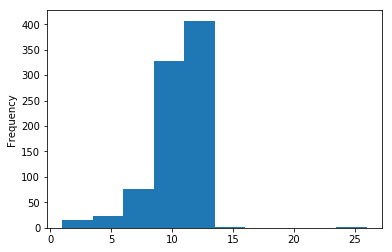

In [58]:
tweets_clean.rating_numerator.plot(kind = 'hist')

In [60]:
tweets_clean.rating_numerator.describe()

count    851.000000
mean      10.197415
std        2.066778
min        1.000000
25%       10.000000
50%       10.000000
75%       12.000000
max       26.000000
Name: rating_numerator, dtype: float64

Distribution likes

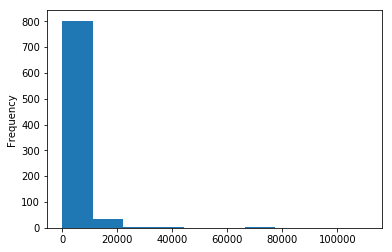

In [86]:
tweets_clean.like_counts.plot(kind = 'hist')

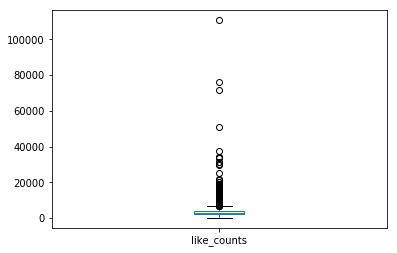

In [88]:
tweets_clean.like_counts.plot(kind = 'box')

In [62]:
tweets_clean.like_counts.describe()

count       851.000000
mean       4214.499412
std        6742.526255
min           0.000000
25%        1989.500000
50%        2712.000000
75%        3901.500000
max      110613.000000
Name: like_counts, dtype: float64

Insight: 50% of the tweets got 2712 or less likes.

Distribution Retweets

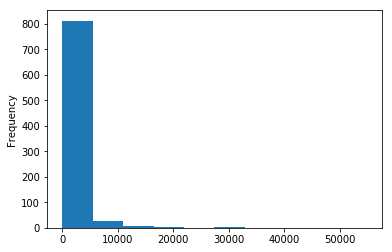

In [65]:
tweets_clean.retweet_counts.plot(kind = 'hist')

In [66]:
tweets_clean.retweet_counts.describe()

count      851.000000
mean      1581.529965
std       3122.371772
min         25.000000
25%        569.000000
50%        885.000000
75%       1395.000000
max      54858.000000
Name: retweet_counts, dtype: float64

In [83]:
(tweets_clean.retweet_counts > 4000).mean()

0.065804935370152765

Correlation

In [67]:
import seaborn as sns

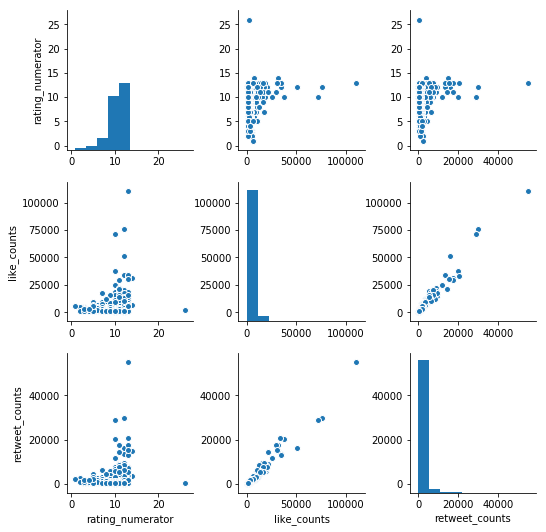

In [75]:
g = sns.pairplot(tweets_clean[['rating_numerator', 'like_counts', 'retweet_counts']])
#g.map_diag(sns.histplot)
#g.map_offdiag(sns.scatterplot)

Insight: There is a clear correlation between retweet counts and like counts.

Correlation dog_stages and rating/likes

In [105]:
stages = ['doggo', 'floofer', 'pupper', 'puppo']

In [113]:
tweets_clean[tweets_clean.dog_stages.isin(stages)].dog_stages.value_counts()

pupper          150
doggo             9
floofer           4
puppo             2
doggopuppo        0
doggopupper       0
doggofloofer      0
                  0
Name: dog_stages, dtype: int64

If we use only the clearly defind stages and not the combination there is much more data for the category pupper thatn for the others. Therefore it is no representative conclusion possible.

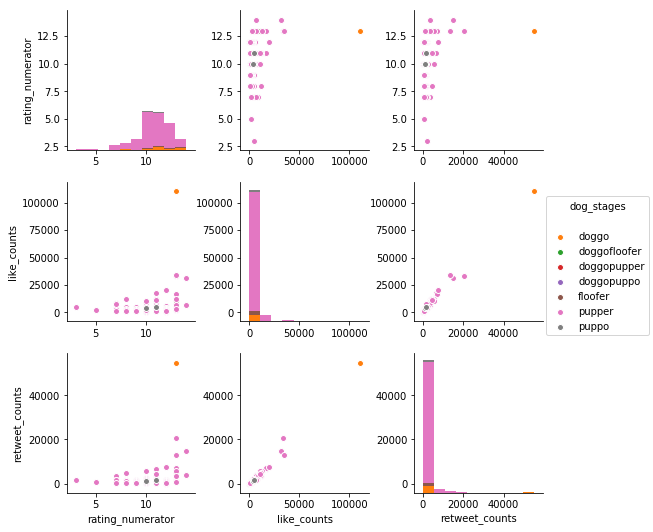

In [103]:
sns.pairplot(tweets_clean[tweets_clean.dog_stages.isin(stages)][['rating_numerator', 'like_counts', 'retweet_counts', 'dog_stages']], hue="dog_stages")

Which breads get the most likes or retweets?